In [9]:

import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [2]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define model - using pretrained ResNet50
model = models.resnet50(pretrained=True)
model = model.to(device)

# Transforms for the input data
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

# Load the ImageNet dataset
data_dir = '/local/musaeed/HLCV23/data/imagenet'
dataset = datasets.ImageFolder(data_dir, transform)
loader = DataLoader(dataset, batch_size=256, shuffle=True)

# List of class names
cls_names = [item[0] for item in dataset.classes]

def get_acc(gt, preds = None):
    if preds is not None:
        return ((preds.argmax(1)==gt).sum()/len(preds)).cpu().numpy()
    return ((preds.argmax(1)==gt).sum()/len(preds)).cpu().numpy()

def get_test_acc(model, loader, device='cuda'):
    model.eval()
    eval_acc = []
    with torch.no_grad():
        for batch in tqdm(loader, leave=False):
            ims, labels = batch
            ims, labels = ims.to(device), labels.to(device)

            outputs = model(ims)
            _, preds = torch.max(outputs, 1)

            val_acc = get_acc(labels.view(-1,), preds)
            eval_acc.append(val_acc)

    return np.mean(eval_acc)

print(get_test_acc(model, loader, device))


cuda


/local/musaeed/anaconda3/envs/t5/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/local/musaeed/anaconda3/envs/t5/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/CE/musaeed/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 110MB/s] 


In [3]:


# Transforms for the input data
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

# Load the ImageNet dataset
data_dir = '/local/musaeed/HLCV23/data/imagenet'
dataset = datasets.ImageFolder(data_dir, transform)
loader = DataLoader(dataset, batch_size=256, shuffle=True)


In [14]:
print(f'Total number of images: {len(dataset)}')
print(f'Classes: {dataset.classes}')


Total number of images: 50000
Classes: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01768244', 'n01770081', 'n01770393', 'n01773157', 'n01773549'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


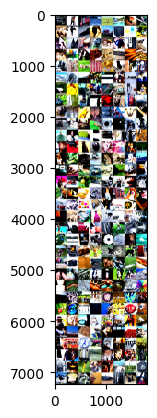

<Figure size 640x480 with 0 Axes>

In [12]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(loader)
# Get some random training images
images, labels = next(iter(loader))

# Show images
imshow(torchvision.utils.make_grid(images))



# Save the plot
plt.savefig("/local/musaeed/HLCV23/notebooksrandom_images_plot.png")

In [5]:

# List of class names
cls_names = [item[0] for item in dataset.classes]
print(cls_names)


['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',

In [15]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

# Define your transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the ImageNet dataset
data_dir = '/local/musaeed/HLCV23/data/imagenet'
dataset = datasets.ImageFolder(data_dir, transform)

# Update the class_to_idx dictionary in the dataset to have the prompts as keys
dataset.class_to_idx = {f"A picture of {cls.replace('_', ' ')}": idx for cls, idx in dataset.class_to_idx.items()}

# Now create your dataloader
loader = DataLoader(dataset, batch_size=256, shuffle=True)


In [16]:
# Load the ImageNet dataset
data_dir = '/local/musaeed/HLCV23/data/imagenet'
dataset = datasets.ImageFolder(data_dir, transform)

# Update the class_to_idx dictionary in the dataset to have the prompts as keys
dataset.class_to_idx = {f"A picture of {cls.replace('_', ' ')}": idx for cls, idx in dataset.class_to_idx.items()}

# Print the unique class names/prompts
# for class_name in dataset.class_to_idx.keys():
#     print(class_name)


A picture of n01440764
A picture of n01443537
A picture of n01484850
A picture of n01491361
A picture of n01494475
A picture of n01496331
A picture of n01498041
A picture of n01514668
A picture of n01514859
A picture of n01518878
A picture of n01530575
A picture of n01531178
A picture of n01532829
A picture of n01534433
A picture of n01537544
A picture of n01558993
A picture of n01560419
A picture of n01580077
A picture of n01582220
A picture of n01592084
A picture of n01601694
A picture of n01608432
A picture of n01614925
A picture of n01616318
A picture of n01622779
A picture of n01629819
A picture of n01630670
A picture of n01631663
A picture of n01632458
A picture of n01632777
A picture of n01641577
A picture of n01644373
A picture of n01644900
A picture of n01664065
A picture of n01665541
A picture of n01667114
A picture of n01667778
A picture of n01669191
A picture of n01675722
A picture of n01677366
A picture of n01682714
A picture of n01685808
A picture of n01687978
A picture o

In [17]:
num_unique_classes = len(dataset.class_to_idx)
print(f"There are {num_unique_classes} unique classes in the dataset.")


There are 1000 unique classes in the dataset.


In [19]:
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
!wget https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json

--2023-07-28 17:43:07--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt.1’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0.002s  

2023-07-28 17:43:07 (13.0 MB/s) - ‘imagenet1000_clsidx_to_labels.txt.1’ saved [30564/30564]

--2023-07-28 17:43:07--  https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.git

In [24]:


import os
import numpy as np
import torch

from tqdm.notebook import tqdm
from src.imagenet_labels import lab_dict
from lavis.processors.blip_processors import BlipCaptionProcessor
from src.blip_lavis import define_model, get_transform
from src.dataloaders import imagenet_c_dataloader, imagenet_dataloader


# TODO: Read: Important notices:
# Note that one transformation is happening as preprocessing goes (the blip one)
# Note that only a low-dimensional projection of the features is used, namely, 'proj' in the next cell... the same for images... Consider checking the full dimension embeddings??

# Note that blip1 is used and not blip2... naturally lavis variant and not huggingface
# Note that 256 batch size is used due to memory limitations
# Note that things work, with initial proof... they just need to be fully run tomorrow morning 27.07.2023
# Note that each severity level takes 4 minutes to complete with batch size of 256 on a 3060TI 8GB

cls_names = [lab_dict[i].replace('_', ' ') for i in os.listdir('/local/musaeed/HLCV23/data/imagenet')]

text_processor = BlipCaptionProcessor(prompt="A picture of ")

cls_prompt = [text_processor(cls_nm) for cls_nm in cls_names]
cls_prompt

ModuleNotFoundError: No module named 'src'

In [30]:


def get_acc(gt, preds):
    # The function calculates the accuracy of the predictions
    # gt - ground truth labels
    # preds - model predictions
    return ((preds.argmax(1) == gt).sum() / len(preds)).cpu().numpy()


def get_test_acc(model, loader, device='cuda'):
    # This function calculates the accuracy of the model on the entire dataset
    # model - the trained model
    # loader - the DataLoader for the test dataset
    # device - the device to run the calculations on
    
    model.eval()  # Set the model to evaluation mode
    eval_acc = []  # List to store the accuracy of each batch
    
    # Disable gradient calculations as we are not training the model, only evaluating
    with torch.no_grad():
        # Iterate over all batches in the DataLoader
        for batch in tqdm(loader, leave=False):
            ims, labels = batch  # Separate images and labels
            ims, labels = ims.to(device), labels.to(device)  # Move to the specified device

            outputs = model(ims)  # Forward pass

            val_acc = get_acc(labels.view(-1,), outputs)  # Calculate accuracy
            eval_acc.append(val_acc)  # Append to the list

    return np.mean(eval_acc)  # Return the mean accuracy

print(get_test_acc(model, loader, device))


  0%|          | 0/196 [00:00<?, ?it/s]

0.7453125


/local/musaeed/HLCV23
